<a href="https://colab.research.google.com/github/DuduVS/Curso_Machine_Learning/blob/master/DogsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from math import ceil
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATASET_DIRECTORY = '/content/drive/My Drive/Machine Learning/DogsCats/'
CATEGORIES = ['Dog', 'Cat']
IMAGE_SIZE = 100

#Dataset

Este dataset é composto por imagens de cães e gatos, totalizando 25000 imagens. Para esta atividade, porém, vão ser utilizadas apenas 200 imagens de cada classe.

In [3]:
training_images = []

def create_training_images():
    for category in CATEGORIES:
        path = os.path.join(DATASET_DIRECTORY, category)
        class_id = CATEGORIES.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(image_array, (IMAGE_SIZE, IMAGE_SIZE))
                training_images.append([resized_image, class_id])
            except Exception as e:
                pass
            
create_training_images()

As imagens são re-escaladas para 100x100 e convertidas para escala de cinza. Neste caso, a cor não ajuda muito na classificação.

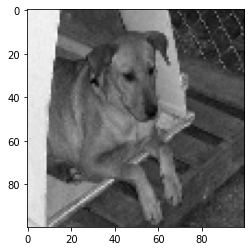

In [4]:
plt.imshow(training_images[0][0], cmap = 'gray')

Exemplo de imagem pré-processada.

#Dados de treino e teste

Definição de X e Y.

In [5]:
X = []
y = []

for features, label in training_images:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
y = np.array(y)

Re-escala de dados.

In [6]:
print(X[0][0][0])

X = X / 255.0

print(X[0][0][0])

[185]
[0.7254902]


Separação dos dados

In [14]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle = True)

#Modelo

In [17]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = (IMAGE_SIZE, IMAGE_SIZE, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation = "relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(1, activation = "sigmoid"))

model.summary()

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 21, 256)      

In [18]:
model.fit(train_X, train_y, epochs = 10, batch_size = 32, shuffle = True, validation_data = (test_X, test_y))

Epoch 1/10
9/9 [==============================] - 0s 43ms/step - loss: 0.8565 - accuracy: 0.4767 - val_loss: 0.6925 - val_accuracy: 0.5250
Epoch 2/10
9/9 [==============================] - 0s 27ms/step - loss: 0.6949 - accuracy: 0.4695 - val_loss: 0.6923 - val_accuracy: 0.5250
Epoch 3/10
9/9 [==============================] - 0s 27ms/step - loss: 0.6937 - accuracy: 0.4875 - val_loss: 0.6939 - val_accuracy: 0.4750
Epoch 4/10
9/9 [==============================] - 0s 26ms/step - loss: 0.6936 - accuracy: 0.4910 - val_loss: 0.6936 - val_accuracy: 0.4750
Epoch 5/10
9/9 [==============================] - 0s 26ms/step - loss: 0.6926 - accuracy: 0.5197 - val_loss: 0.6935 - val_accuracy: 0.4667
Epoch 6/10
9/9 [==============================] - 0s 27ms/step - loss: 0.6913 - accuracy: 0.5914 - val_loss: 0.6962 - val_accuracy: 0.4667
Epoch 7/10
9/9 [==============================] - 0s 27ms/step - loss: 0.6939 - accuracy: 0.5484 - val_loss: 0.6937 - val_accuracy: 0.4167
Epoch 8/10
9/9 [===========

#Resultados

Os resultados não foram bons, provavelmente devido a pouca quantidade de dados. Usando todas a imagens e e um modelo mais completo, acredito ser possível obter bons resultados.